**ETAPA 01 - PREMISSAS E VISUALIZAÇÃO DOS DADOS**

- Importando as bibliotecas necessárias

In [1]:
#Algebra linear
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 25)

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#K-Fold cross validation
from sklearn.model_selection import cross_val_score

#metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc
import warnings
warnings.filterwarnings("ignore")

- Fazendo a leitura dos dados

In [2]:
df = pd.read_csv('Bias_correction_ucl.csv', index_col='Date', parse_dates=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#visualizando as 5 ultimas filas de dados
df.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-30,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
2017-08-30,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
2017-08-30,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
NaT,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
NaT,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


- Dividindo os dados de data em dias, meses e anos para facilitar a visualização

In [4]:
df.reset_index(inplace=True)
df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']   = df['Date'].dt.day
df.set_index('Date', inplace=True)

- Primeiras informações acerca dos dados

In [5]:
print('Primeiras informações: ')
print()
df.info()

Primeiras informações: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_

- É possível visualizar os dados faltantes através de:

In [6]:
print('A lista de índices com valores nulos: ')
print()
print(df.isnull().sum())

A lista de índices com valores nulos: 

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
Day                  2
dtype: int64


- É importante tratar esses dados faltantes (nulos, NAN) em nossa base dados. 
- Esses dados podem contribuir negativamente para as predições.

Vamos Eliminar as 2 últimas filas dos dados, uma vez que não têm informações relevantes

In [7]:
df.drop(df.tail(2).index, inplace=True)

Como ficaram os dados faltantes:

In [8]:
print('A lista de índices com valores nulos: ')
print()
print(df.isnull().sum())

A lista de índices com valores nulos: 

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64


In [9]:
#visualizando novamente o dataframe
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


- Estamos lidando com uma base de dados com atributos em relação ao tempo onde as colunas "Estação" e "Data" não têm valores nulos;

- Analinsado as informação do df, podemos observar que todas as colunas podem ser agrupadas em 3 grandes grupos;

- Com base no número de valores faltantes nas suas respectivas colunas, vamos verificar se estes valores têm mesmos índices.

In [10]:
#grupo 1
index_present_tmax= df['Present_Tmax'].index[df['Present_Tmax'].apply(np.isnan)]
index_present_tmin= df['Present_Tmin'].index[df['Present_Tmin'].apply(np.isnan)]

#grupo2
index_next_tmax   = df['Next_Tmax'].index[df['Next_Tmax'].apply(np.isnan)]
index_next_tmin   = df['Next_Tmin'].index[df['Next_Tmin'].apply(np.isnan)]

#grupo 3
index_LDAPS_RHmax = df['LDAPS_RHmax'].index[df['LDAPS_RHmax'].apply(np.isnan)]
index_LDAPS_RHmin = df['LDAPS_RHmin'].index[df['LDAPS_RHmin'].apply(np.isnan)]
index_Tmax_lapse  = df['LDAPS_Tmax_lapse'].index[df['LDAPS_Tmax_lapse'].apply(np.isnan)]
index_Tmin_lapse  = df['LDAPS_Tmin_lapse'].index[df['LDAPS_Tmin_lapse'].apply(np.isnan)]
index_LDAPS_WS    = df['LDAPS_WS'].index[df['LDAPS_WS'].apply(np.isnan)]
index_LDAPS_LH    = df['LDAPS_LH'].index[df['LDAPS_LH'].apply(np.isnan)]
index_LDAPS_CC1   = df['LDAPS_CC1'].index[df['LDAPS_CC1'].apply(np.isnan)]
index_LDAPS_CC2   = df['LDAPS_CC2'].index[df['LDAPS_CC2'].apply(np.isnan)]
index_LDAPS_CC3   = df['LDAPS_CC3'].index[df['LDAPS_CC3'].apply(np.isnan)]
index_LDAPS_CC4   = df['LDAPS_CC4'].index[df['LDAPS_CC4'].apply(np.isnan)]
index_LDAPS_PPT1  = df['LDAPS_PPT1'].index[df['LDAPS_PPT1'].apply(np.isnan)]
index_LDAPS_PPT2  = df['LDAPS_PPT2'].index[df['LDAPS_PPT2'].apply(np.isnan)]
index_LDAPS_PPT3  = df['LDAPS_PPT3'].index[df['LDAPS_PPT3'].apply(np.isnan)]
index_LDAPS_PPT4  = df['LDAPS_PPT4'].index[df['LDAPS_PPT4'].apply(np.isnan)]

In [11]:
if list(index_present_tmax) == list(index_present_tmin):
    print('Lists are identical')
else: print('Unidentical lists')

if list(index_next_tmax) == list(index_next_tmin):
    print('Lists are identical')
else: print('Unidentical lists')
        
if list(index_LDAPS_RHmax)==list(index_LDAPS_RHmin)==list(index_Tmax_lapse)==list(index_Tmin_lapse)==list(index_LDAPS_WS)==list(index_LDAPS_LH)==list(index_LDAPS_CC1)==list(index_LDAPS_CC2)==list(index_LDAPS_CC3)==list(index_LDAPS_CC4)==list(index_LDAPS_PPT1)==list(index_LDAPS_PPT2)==list(index_LDAPS_PPT3)==list(index_LDAPS_PPT4):
    print('Lists are identical')
else: print('Unidentical lists')

Lists are identical
Lists are identical
Lists are identical


Aqui podemos visualizar e obter a informação de que os valores faltantes nos grupos estão nos mesmos índices

<AxesSubplot:ylabel='Date'>

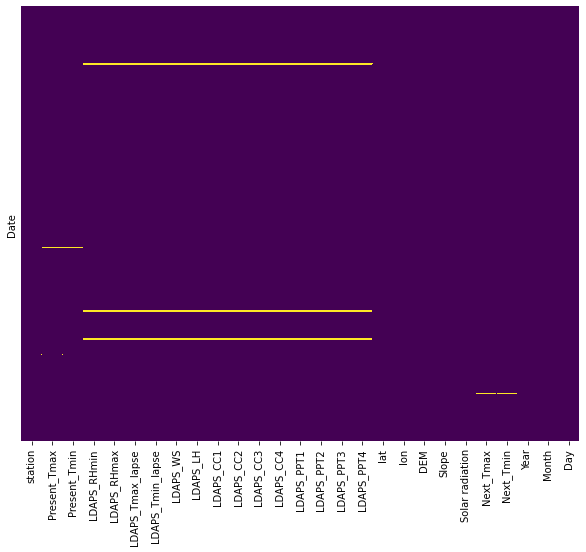

In [12]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.isnull()
            ,yticklabels=False,cbar=False,cmap='viridis')

- Para fazermos o devido tratamento dos dados faltantes em cada uma dessas colunas, vamos dividir nosso df em 'estações'. Assim, podemos minimizar a possibilidade de viés entre as estações;
- De acordo com o df, temos 25 estações;
- vamos criar um laço e ir adicionando os registros em cada uma das listas conforme suas estações.

In [13]:
no_stations = 25
station = [[] for _ in range(no_stations + 1)]

for i in range(1, len(station)):
    station[i] = df.loc[df['station'] == i]

- Assim, criamos 25 dataframes respectivos para cada estação definida no df principal;
- cada um dos 25 df's tem 310 linhas × 27 colunas;
- o df principal tem 25*310 linhas = 7750 linhas x 27 colunas

In [14]:
#visualizando um dos 25 df's
station[25]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-30,25.0,32.5,24.2,50.274609,75.525017,29.963753,24.972864,6.265457,23.342176,0.283318,0.289610,0.203459,...,0.000000,0.000000,37.5237,126.97,19.5844,0.2713,5855.093750,32.0,24.2,2013.0,6.0,30.0
2013-07-01,25.0,31.5,24.2,63.295822,90.151245,28.074100,23.120398,11.788976,88.430416,0.585977,0.861969,0.770710,...,0.253648,2.594355,37.5237,126.97,19.5844,0.2713,5849.743164,28.8,21.9,2013.0,7.0,1.0
2013-07-02,25.0,28.5,23.0,46.029549,89.796349,30.451813,21.290055,8.811855,22.261239,0.250238,0.228730,0.032090,...,0.000000,0.000000,37.5237,126.97,19.5844,0.2713,5843.812988,31.0,20.7,2013.0,7.0,2.0
2013-07-03,25.0,30.8,20.8,66.421783,86.664803,30.363160,24.067773,8.111393,16.093959,0.201254,0.530749,0.446360,...,0.000000,0.046989,37.5237,126.97,19.5844,0.2713,5837.300781,27.9,23.2,2013.0,7.0,3.0
2013-07-04,25.0,27.5,24.3,45.619457,89.802383,32.984684,24.397277,6.213521,25.742360,0.796958,0.490319,0.171806,...,0.000000,0.000000,37.5237,126.97,19.5844,0.2713,5830.207520,31.4,22.2,2013.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-26,25.0,29.3,20.8,35.768570,73.089195,27.358369,20.178119,5.725574,8.612653,0.071638,0.460993,0.390749,...,0.000000,0.000000,37.5237,126.97,19.5844,0.2713,4607.025879,27.2,20.6,2017.0,8.0,26.0
2017-08-27,25.0,26.6,20.7,51.889240,88.492317,26.850981,21.182844,7.735349,37.386415,0.467923,0.516202,0.819804,...,0.021030,3.093815,37.5237,126.97,19.5844,0.2713,4568.769043,28.5,18.5,2017.0,8.0,27.0
2017-08-28,25.0,27.4,18.5,24.243977,90.012634,24.468071,17.454108,8.876831,17.751039,0.393134,0.084461,0.048236,...,0.000000,0.000000,37.5237,126.97,19.5844,0.2713,4530.068848,23.4,18.1,2017.0,8.0,28.0


- Agora vamos tratar cada dado faltante por estação:

In [15]:
station[25].isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         3
LDAPS_RHmax         3
LDAPS_Tmax_lapse    3
LDAPS_Tmin_lapse    3
LDAPS_WS            3
LDAPS_LH            3
LDAPS_CC1           3
LDAPS_CC2           3
LDAPS_CC3           3
LDAPS_CC4           3
LDAPS_PPT1          3
LDAPS_PPT2          3
LDAPS_PPT3          3
LDAPS_PPT4          3
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

In [16]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7750.000000,7680.000000,7680.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,...,7675.000000,7675.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7723.000000,7723.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,0.356047,0.318359,...,0.276208,0.267307,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837,2015.000000,7.467742,15.983871
std,7.211568,2.966947,2.409233,14.656200,7.183861,2.942632,2.342243,2.177080,33.679766,0.262369,0.257968,0.250253,...,1.148292,1.191776,0.050335,0.079406,54.256953,1.369833,428.996445,3.123441,2.483181,1.414305,0.530334,8.918647
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,7.000000,27.800000,21.700000,45.963839,84.223911,27.673670,22.089794,5.679220,37.272626,0.146673,0.140623,0.101466,...,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,...,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.189583,93.743027,31.709230,25.152881,8.031527,84.222851,0.575126,0.558551,0.496700,...,0.007893,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,...,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


In [17]:
station[1].describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,310.0,306.000000,306.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,310.000000,310.000000,310.000000,310.0000,310.000000,310.000000
mean,1.0,26.985621,21.164706,62.660746,92.682228,27.852246,22.118913,8.375969,77.535905,0.362039,0.352508,0.322359,...,0.296274,0.223088,3.760460e+01,1.269910e+02,2.123350e+02,2.785000e+00,5476.319128,27.518710,20.893871,2015.0000,7.467742,15.983871
std,0.0,2.768628,2.164921,14.662408,5.978446,2.769762,2.208582,2.706190,27.880316,0.269713,0.267154,0.256401,...,1.307432,0.961266,6.405224e-14,1.053303e-12,7.401592e-13,6.672108e-15,416.721036,2.956914,2.225404,1.4165,0.531157,8.932490
min,1.0,20.000000,15.100000,33.251183,69.617020,17.624954,14.272646,4.348657,9.371270,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.760460e+01,1.269910e+02,2.123350e+02,2.785000e+00,4575.028809,17.400000,13.600000,2013.0000,6.000000,1.000000
25%,1.0,25.100000,19.900000,51.556540,88.865128,26.005571,20.841676,6.562075,58.264273,0.122190,0.130578,0.113086,...,0.000000,0.000000,3.760460e+01,1.269910e+02,2.123350e+02,2.785000e+00,5152.121094,25.500000,19.500000,2014.0000,7.000000,8.000000
50%,1.0,27.100000,21.400000,60.666447,94.552017,28.037432,22.381389,7.561871,78.317977,0.306907,0.304831,0.250122,...,0.000000,0.000000,3.760460e+01,1.269910e+02,2.123350e+02,2.785000e+00,5564.090820,27.700000,21.200000,2015.0000,7.000000,16.000000
75%,1.0,29.200000,22.700000,73.428516,97.252548,29.820779,23.669855,9.637313,95.312722,0.536995,0.544115,0.501648,...,0.028065,0.000363,3.760460e+01,1.269910e+02,2.123350e+02,2.785000e+00,5855.396973,29.875000,22.500000,2016.0000,8.000000,24.000000
max,1.0,32.900000,26.000000,95.818939,100.000153,33.360508,26.625472,20.854164,155.239601,0.951899,0.966186,0.980176,...,14.046389,7.648327,3.760460e+01,1.269910e+02,2.123350e+02,2.785000e+00,5992.895996,33.400000,25.700000,2017.0000,8.000000,31.000000


In [18]:
df['Next_Tmin'][0]

21.2

- o desvio padrão é menor e o número total de NAN são menores tb, podemos ajustar esses NAN com a média da coluna;

In [19]:
for i in range(1, len(station)):
    station[i] = station[i].fillna(station[i].mean())

- Visualizando a ausência de dados faltantes na primeira estação, por exemplo:

<AxesSubplot:ylabel='Date'>

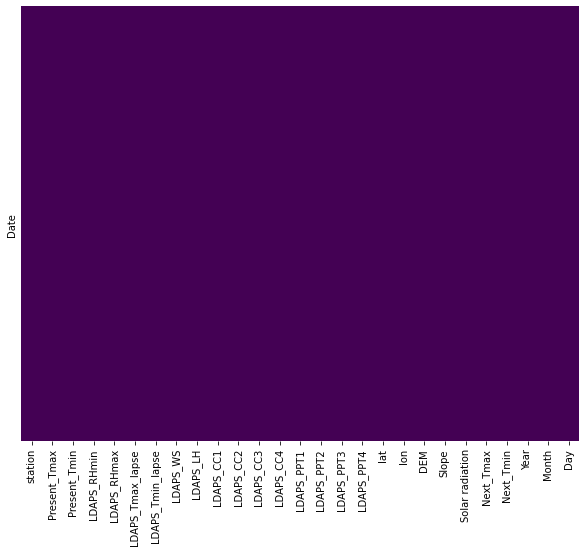

In [20]:
plt.figure(figsize=(10,8)) 
sns.heatmap(station[1].isnull()
            ,yticklabels=False,cbar=False,cmap='viridis')

- Agora, vamos vizualizar como essas estações estão distribuidas;
- Para isso, vamos plotar as localizações geográficas das estações tom,ando como base os dados de latitude e longitude para termos uma idéia aproximada de suas proximidades;
- Essa etapa auxilia na verificação de quão esparsas e independentes elas estão, se existe correlações;

Text(0.5, 1.0, 'Localização geográfica das estações')

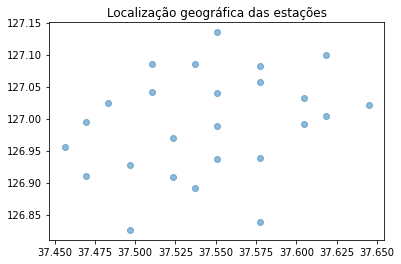

In [21]:
new_data = pd.DataFrame(columns=['lat','lon'], index=range(0,25))

for i in range(0,25):
    new_data['lat'][i] = df['lat'][i]
    new_data['lon'][i] = df['lon'][i]
    
#Plotando
ig, ax = plt.subplots()
ax.scatter(new_data['lat'],new_data['lon'], alpha=0.5)
plt.title('Localização geográfica das estações')

In [22]:
labels = [i for i in range(1, len(station))]
for i, txt in enumerate(labels):
    ax.annotate(txt, (new_data['lat'][i],new_data['lon'][i]))

- Por mais que esses dados tratem de uma série temporal, a temperatura do dia depende de fatores metereológicos daquele dia em particular;
- Partindo da ideia de que se podemos medir esses fatores no dia seguinte, logo poderemos prever tb a temperatura no dia seguinte;
- Vejamos a Temperatura Next_Max por 4 anos (2013 a 2016) em todas as estações (caso 01);
- Depois, vejamos como se comporta a Temperatura Next_Max em todas as estações em um ano em específico (caso 02).

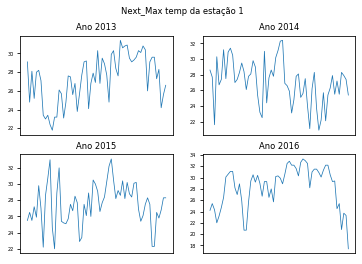

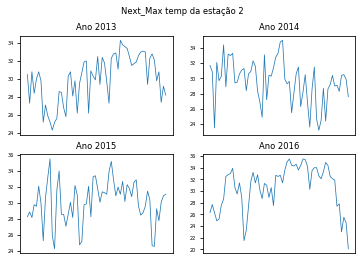

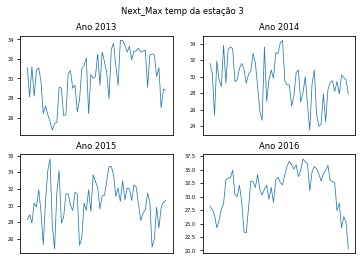

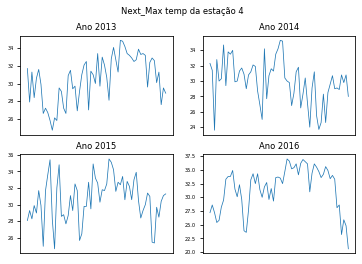

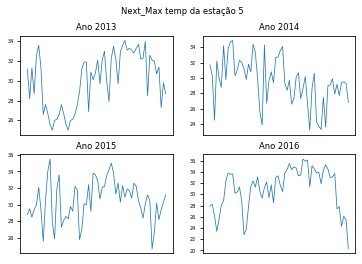

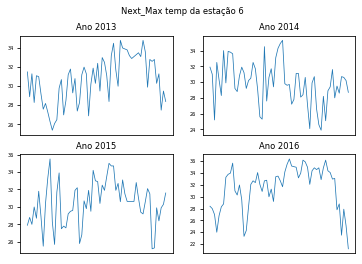

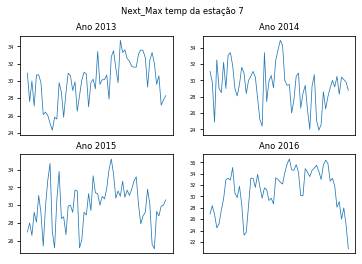

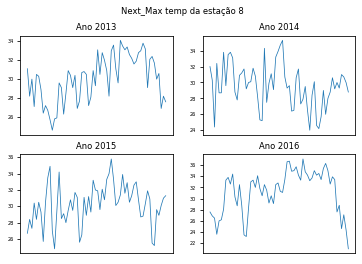

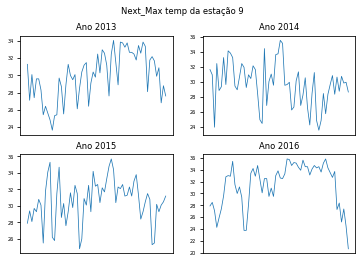

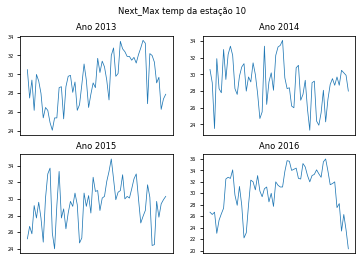

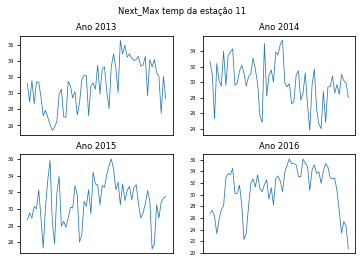

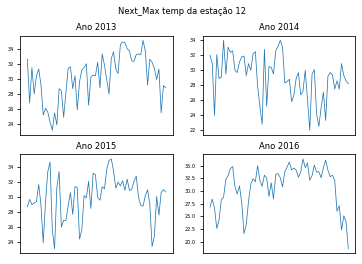

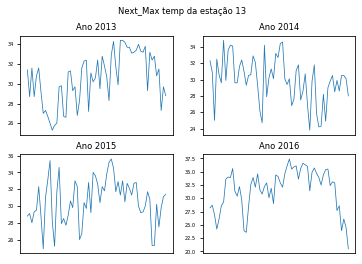

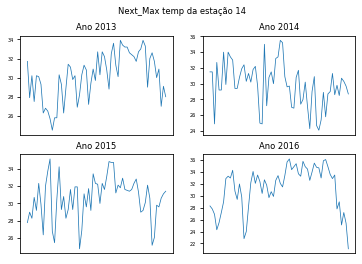

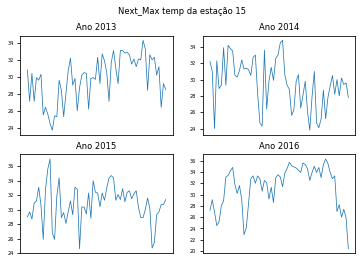

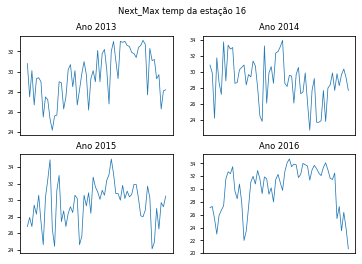

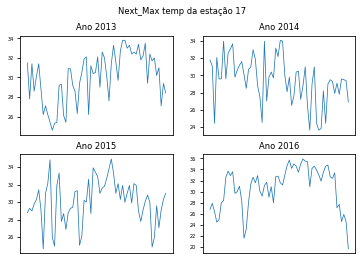

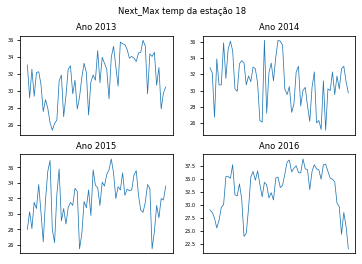

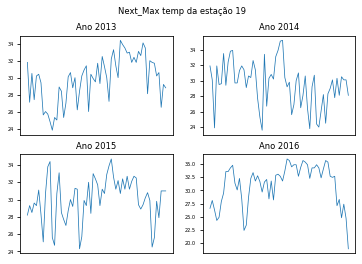

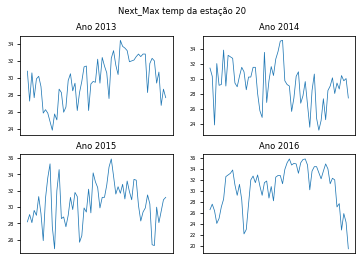

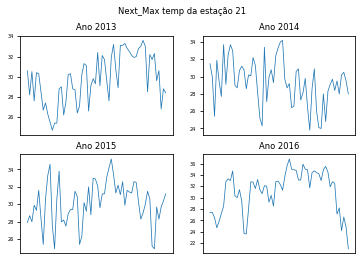

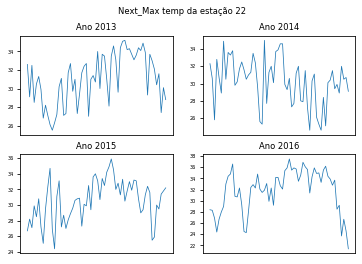

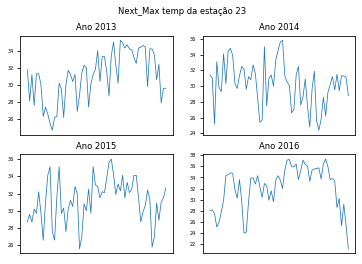

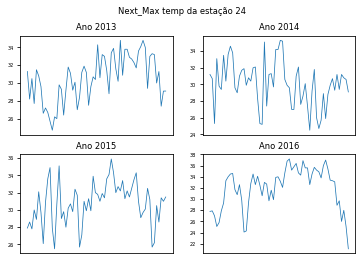

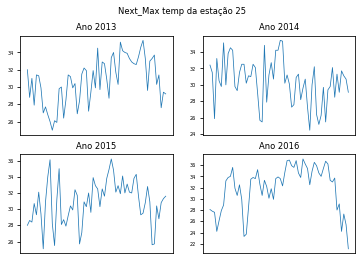

In [23]:
#CASO 01

for i in range(1,len(station)):

    plt.rcParams.update({'font.size': 7})
    ncols = 2
    nrows = 2
     
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Next_Max temp da estação {}'.format(i))
    
    years = [2013,2014,2015,2016]
    
    for ax, j in zip(axes.flatten(), years):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
        ax.title.set_text('Ano {}'.format(j))
    
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5) 

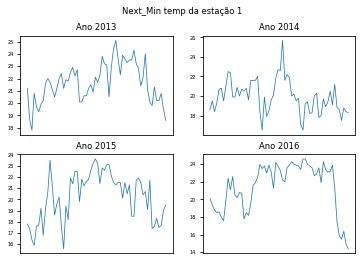

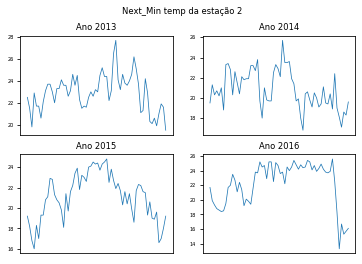

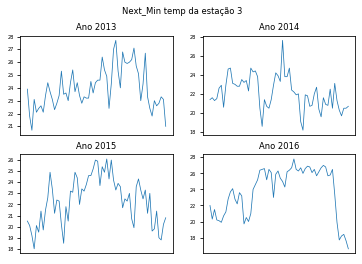

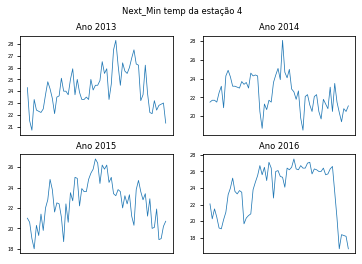

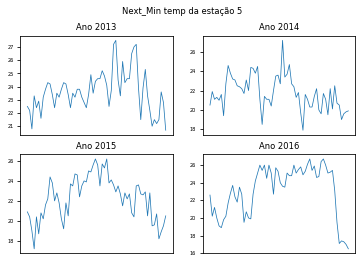

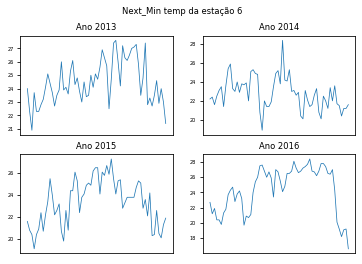

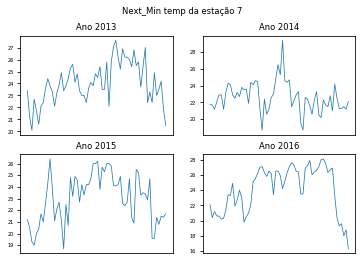

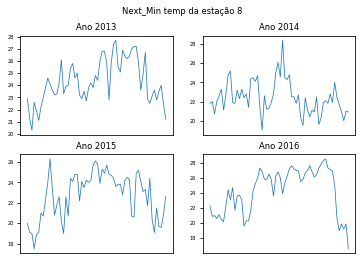

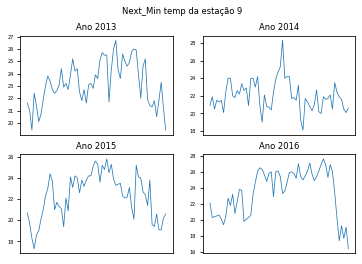

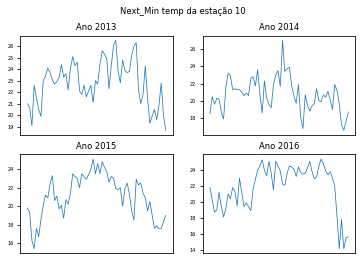

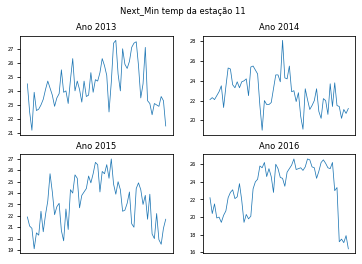

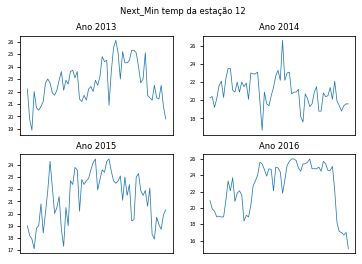

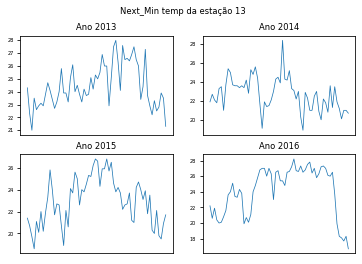

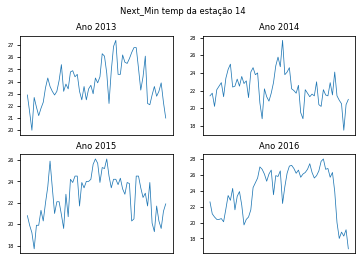

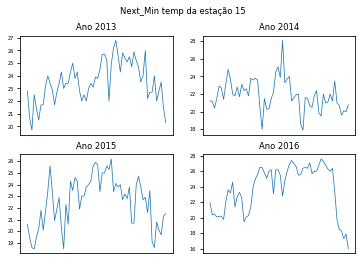

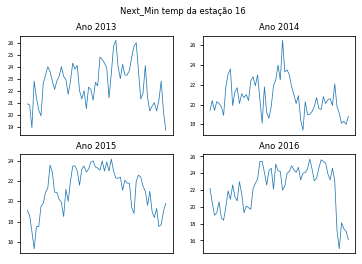

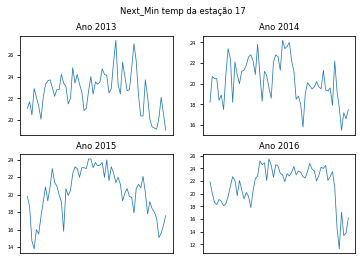

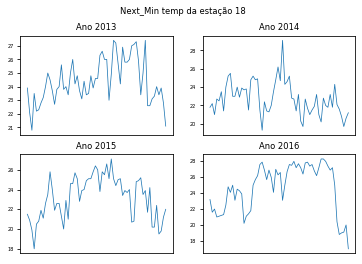

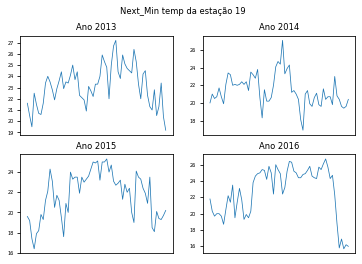

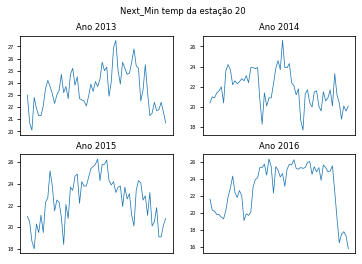

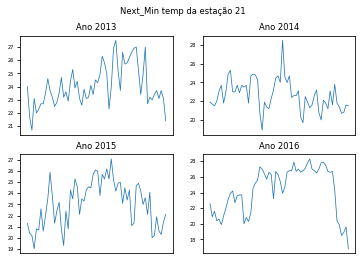

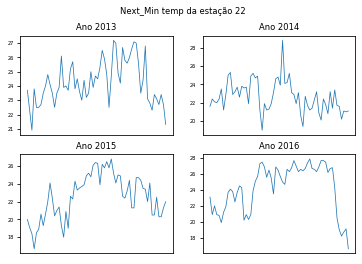

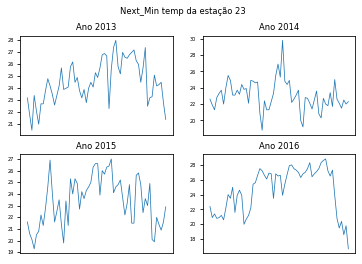

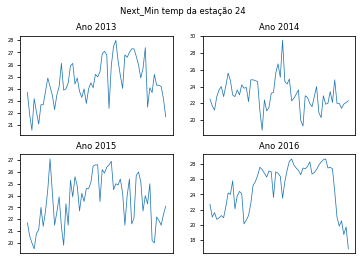

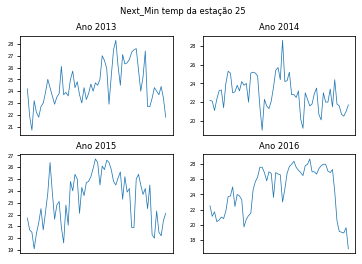

In [24]:
#CASO 01

for i in range(1,len(station)):

    plt.rcParams.update({'font.size': 7})
    ncols = 2
    nrows = 2
     
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Next_Min temp da estação {}'.format(i))
    
    years = [2013,2014,2015,2016]
    
    for ax, j in zip(axes.flatten(), years):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmin'], linewidth=0.75)
        ax.title.set_text('Ano {}'.format(j))
    
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5) 

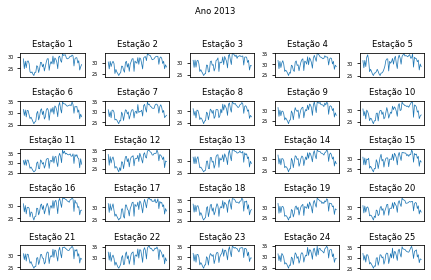

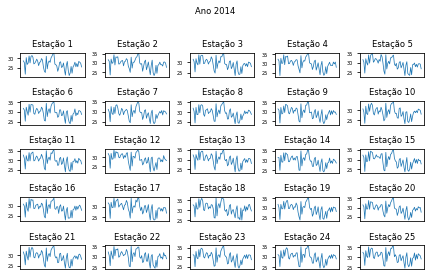

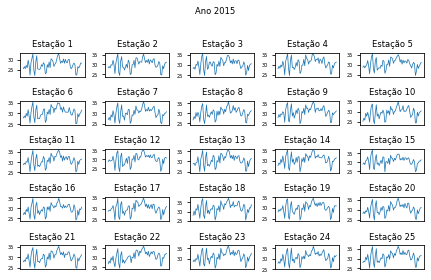

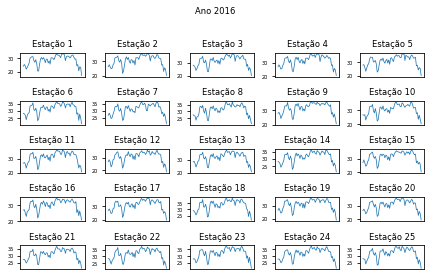

In [25]:
#CASO 02

for j in years:
    
    ncols = 5
    nrows = 5
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Ano {}'.format(j))
    i = range(1,26)
    
    for ax, i in zip(axes.flatten(), i):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
        ax.title.set_text('Estação {}'.format(i))
        
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

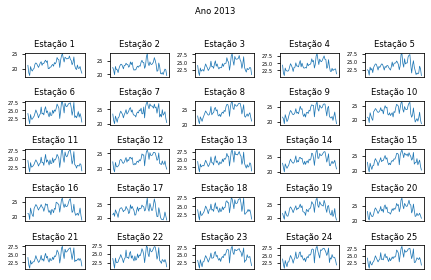

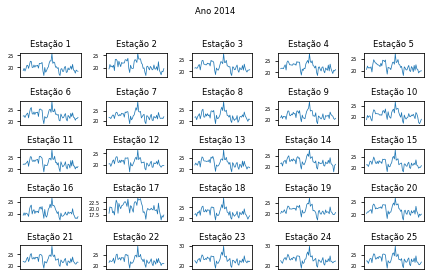

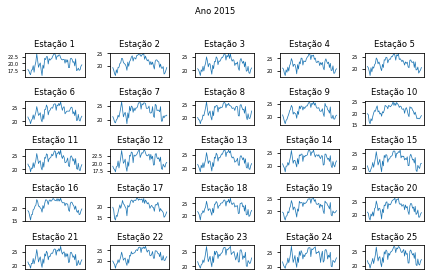

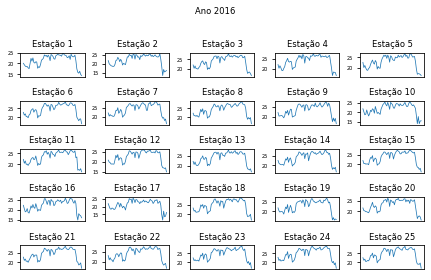

In [26]:
#CASO 02

for j in years:
    
    ncols = 5
    nrows = 5
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Ano {}'.format(j))
    i = range(1,26)
    
    for ax, i in zip(axes.flatten(), i):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmin'], linewidth=0.75)
        ax.title.set_text('Estação {}'.format(i))
        
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

- No primeiro caso, vemos que não há relação entre a temperatura Next_Max quando verificada ao longo dos anos em uma determinada estação. Mas no caso 02, podemos ver que há uma tendência semelhante da temperatura nas estações todos os anos.

**ETAPA 02 - PREVISÃO E VERIFICAÇÃO DE VIÉS**

- A partir da análise anterior, vamos começar as previsões;
- Vamos usar os dados de 2013 a 2016 como dados de treinamento do modelo e prever os dados metereológicos de 2017;
- Por se tratar de um problema de regressão, vamos usar o modelo 'Regressão Linear Multivariada' para prever;
- Não vamos ajustar o modelo em todos os dados entre 2013 e 2016, mas vamos fazê-lo separadamente para cada estação, pois estabelecemos que elas são independentes umas das outras;
- Para cada estação temos 310 registros de dados, sendo 248 registros usados para treinamento (80% dos dados, correspondendo aos anos de 2013 a 2016) e 62 para previsão(20% dos dados, correspondendo ao ano de 2017). 

In [27]:
#realizando a separação dos dados em treinamento e teste
#usando somente a primeira estação, por exemplo

train = station[1].loc[station[1]['Year']!=2017]  
valid = station[1].loc[station[1]['Year']==2017]

- Das 25 colunas, algumas são específicas da sua estação, logo as removeremos. Eles são 'station', 'lat', 'lon', 'DEM', 'Slope', 'Year', 'Month', 'Day'; 
- As demais vamos utilizar para treinar o modelo 'Multivariate Regression' para prever o 'Next_Tmax' e 'Next_Tmin'.

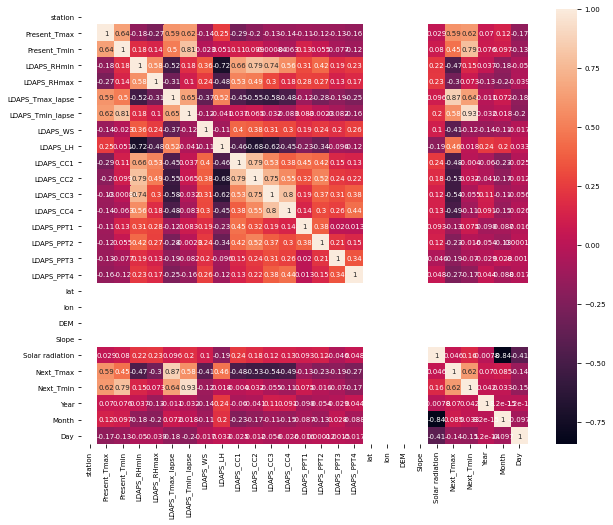

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_stt_01 =station[1].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_stt_01, annot=True)
plt.show()

In [29]:
#drop nas colunas constante para estação 1 (caracteristica geográfica)
train = train.drop(['station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
valid = valid.drop(['station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)

- Separando os dados de treinamento e teste da primeira estação:
- X_train: compreende todos os previsores dos anos 2013 a 2016 que serão usados na fase de treinamento, total de 19 colunas e 248 registros;
- Y_train: compreende os targets Next_max e Next_min para os anos de 2013 a 2016 usados na fase de treinamento, total de 1 coluna e 248 registros;
- X_test: compreende todos os previsores de 2017 usados na fase de teste, total de 19 colunas e 62 registros;
- Y_test: compreende os targets NextNext_max e Next_min para o ano de 2017 usados na fase de treinamento, total de 1 coluna e 




In [30]:
#train e test para Tmax e Tmin
X_train = train.iloc[:, :-2].values
Y_train_Tmax = train.iloc[:, [-2]].values
Y_train_Tmin = train.iloc[:, [-1]].values

X_test = valid.iloc[:, :-2].values
Y_test_Tmax = valid.iloc[:, [-2]].values
Y_test_Tmin = valid.iloc[:, [-1]].values

- É necessário normalizar os previsores (todas as colunas independentes):

In [31]:
#Normalizando os dados
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

- Vamos treinar os modelos para Tmax e Tmin usando o modelo mais simples para problemas de regressão (previsão de dados contínuos):

In [32]:
#aplicando regressão linear para Tmax
regressor_max = LinearRegression()
regressor_max.fit(X_train, Y_train_Tmax)

LinearRegression()

In [33]:
#aplicando regressão linear para Tmin
regressor_min = LinearRegression()
regressor_min.fit(X_train, Y_train_Tmin)

LinearRegression()

- E realizar as predições:

In [34]:
Y_pred_Tmax  = regressor_max.predict(X_test)
Y_pred_Tmin  = regressor_min.predict(X_test)

In [35]:
#K-fold cross validation para Tmax
accuracies_max = cross_val_score(estimator = regressor_max, X = X_train, y = Y_train_Tmax, cv = 10)
acc_mean_max = accuracies_max.mean()
acc_std_max  = accuracies_max.std()

In [36]:
#K-fold cross validation para Tmin
accuracies_min = cross_val_score(estimator = regressor_min, X = X_train, y = Y_train_Tmin, cv = 10)
acc_mean_min = accuracies_min.mean()
acc_std_min  = accuracies_min.std()

In [37]:
kfold = {'acc_mean_max':acc_mean_max, 'acc_std_max':acc_std_max,
         'acc_mean_min':acc_mean_min, 'acc_std_min':acc_std_min}

acc_max = round(regressor_max.score(X_train, Y_train_Tmax)*100, 2)
acc_min = round(regressor_min.score(X_train, Y_train_Tmin)*100, 2)

- E obter as acurácias para Tmax e Tmin:

In [38]:
acc = {'Tmax accuracy':acc_max, 'Tmin_accuracy':acc_min}

Y_pred_Tmax = pd.DataFrame(Y_pred_Tmax)
Y_pred_Tmin = pd.DataFrame(Y_pred_Tmin)

Y_pred_Tmax.columns = ['Predicted Next_Tmax']
Y_pred_Tmin.columns = ['Predicted Next_Tmin']

Y_pred = pd.concat([Y_pred_Tmax, Y_pred_Tmin], axis=1, join='inner')
test = valid
test.index = [i for i in range(0,len(test))]

acc

{'Tmax accuracy': 80.43, 'Tmin_accuracy': 86.29}

- E plotar os resultados preditos x reais:

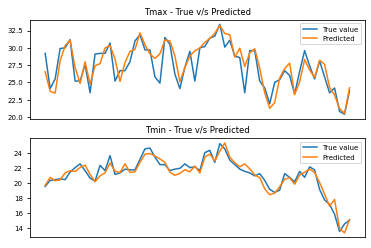

In [39]:
nrows = 2
ncols = 1
fig, (ax1,ax2) = plt.subplots(nrows=nrows, ncols=ncols)

ax1.plot(test['Next_Tmax'], label='True value')
ax1.plot(Y_pred['Predicted Next_Tmax'], label='Predicted')
ax1.title.set_text('Tmax - True v/s Predicted')
ax1.set_xticks([])
ax1.tick_params(axis='y', labelsize=7)
ax1.legend(loc='upper right')

ax2.plot(test['Next_Tmin'], label='True value')
ax2.plot(Y_pred['Predicted Next_Tmin'], label='Predicted')
ax2.title.set_text('Tmin - True v/s Predicted')
ax2.set_xticks([])
ax2.tick_params(axis='y', labelsize=7)
ax2.legend(loc='upper right')

- Vale ressaltar que esses dados são provenientes da estação 1. De forma semelhante, o mesmo tratamento pode ser aplicado às demais estações.

**ETAPA 03 - AVALIANDO A SENSIBILIDADE E A PRECISÃO DO TREINAMENTO DO MODELO**

- Para avaliar o recall e precision dos dados acima, precisamos transformar os 'target labels' numéricos em categóricos;
- Essa etapa pode ser executada de várias maneiras, optamos por utilizar a biblioteca 'KBinsDiscretizer' do scikit-learn;
- Basicamente ela realiza a binarização dos dados (dados contínuos transformados em intervalos);
- Como estratégia para definir a largura das caixas, utilizamos o k-means, onde os valores em cada bin têm o mesmo centro mais próximo de um cluster k-means.

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

est.fit(Y_train_Tmax)
est.fit(Y_train_Tmin)
est.fit(Y_test_Tmax)
est.fit(Y_test_Tmin)

Y_train_Tmax_dis = est.transform(Y_train_Tmax)
Y_train_Tmin_dis = est.transform(Y_train_Tmin)
Y_test_Tmax_dis = est.transform(Y_test_Tmax)
Y_test_Tmin_dis = est.transform(Y_test_Tmin)

In [41]:
#aplicando regressão logistica para Tmax
classificador_max = LogisticRegression()
classificador_max.fit(X_train, np.ravel(Y_train_Tmax_dis))

LogisticRegression()

In [42]:
#aplicando regressão logistica para Tmin
classificador_min = LogisticRegression()
classificador_min.fit(X_train, np.ravel(Y_train_Tmin_dis))

LogisticRegression()

In [43]:
#separando os dados de teste do modelo de classificação
predicted_y_max = classificador_max.predict(X_test)
predicted_y_min = classificador_min.predict(X_test)

In [44]:
#visualizando os coeficientes dos classificadores
print(classificador_max.coef_)
print()
print(classificador_min.coef_)

[[-0.20382329 -0.36208558  0.29254115  0.08951083 -0.37338306 -0.40724003
   0.37688453 -0.03785315  0.18321666  0.32312788  0.35931504  0.30740546
  -0.02463492  0.03649838  0.23040365  0.11070622 -0.47634636]
 [-0.40902188 -0.15826526  0.27543913  0.07003962 -0.62437326 -0.57078281
  -0.21209595  0.26127986  0.40923978  0.09528631 -0.1576928   0.25431833
  -0.14900274 -0.0394901  -0.20411772  0.13570753 -0.07328745]
 [ 0.61284517  0.52035084 -0.56798028 -0.15955044  0.99775632  0.97802284
  -0.16478859 -0.22342671 -0.59245643 -0.41841419 -0.20162224 -0.56172379
   0.17363767  0.00299172 -0.02628594 -0.24641375  0.54963381]]

[[-0.7257007  -1.61399768 -1.04443565 -0.87770858 -1.58039144 -2.77995811
   0.69415777  0.12906091 -0.15923088  0.226349   -0.06075072  0.13643315
  -0.17368462 -0.23015162 -0.05739724 -0.15727251 -0.30818124]
 [-0.07854664 -0.55133993  0.12292709  0.78209374 -0.34122162 -0.9748838
  -0.68003912 -0.03798091  0.26328066 -0.33884211  0.16995282 -0.08787821
  -0.11

In [45]:
# Avaliando as métricas do modelo calibrado
print('Logistic Regression Model - Tmax: ')
print(classification_report(Y_test_Tmax_dis, predicted_y_max))
print(confusion_matrix(np.ravel(Y_test_Tmax_dis), predicted_y_max))

Logistic Regression Model - Tmax: 
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62

[[ 0  2]
 [ 0 60]]


In [46]:
# Avaliando as métricas do modelo calibrado
print('Logistic Regression Model - Tmin: ')
print(classification_report(Y_test_Tmin_dis, predicted_y_min))
print(confusion_matrix((Y_test_Tmin_dis), predicted_y_min))

Logistic Regression Model - Tmin: 
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.81      0.77      0.79        22
         2.0       0.86      0.91      0.89        35

    accuracy                           0.85        62
   macro avg       0.89      0.83      0.86        62
weighted avg       0.86      0.85      0.85        62

[[ 4  1  0]
 [ 0 17  5]
 [ 0  3 32]]


- o n° de clusters foi obtido de forma manual (sem otimização de hiperparâmetros);
- É possível notar um desbalanceamento nos dados de Next_TMax, que dividiu o dataset de teste em apenas dois grupos (cluster 1 com 2 registros e cluster 2 com 60). Esse desbalanceamento favoreceu a classe majoritária, demostrando um forte enviezamento;
- O mesmo não foi observado na classificação de Next_TMin, os dados estão mais granulares entre os clusters, e o modelo conseguiu prever as classes com uma boa capacidade de generalização.

**Sugestões e outras estratégias** 

*1 - Pré-processamento dos dados*

- Algumas etapas podem ser aplicadas no pré-processamento dos dados como tentativa de melhorar os resultados dos modelos e o tradeoff viés/variancia;
- Bagging e outras técnicas de reamostragem podem ser usadas para reduzir a variação nas previsões do modelo;
- Usar mais dados no treinamento também ajuda, para aumentar a aprendizagem do modelo para os padrões existentes;
- Algumas colunas (variáveis) poderiam não ser tão revelantes para o modelo, portanto, algumas análises estatísticas como a de p-valor e até mesmo uma análise de Principal Component Analysis(PCA) seria interessante. Essa etapa provavelmente promoveria a redução de dimensionalidade, o que impactaria positivamente principalmente em modelos usados para posterior deployed;


*2 - Modelagem*

- Outra estratégia poderia ser utilizada para a divisão de treino e teste adotando, por exemplo, a técnica  “walk forward validation” que é tecnica mais apropriada para séries temporais. A ideia aqui é separar as séries temporais em intervalos de tempo fixos, expandindo o conjunto de treino em cada iteração. Assim, a divisão seguirá a ordem de ocorrência dos registros;
- Análise da degradaçao do modelo ao longo do tempo. Em modelos em produção, essa análise é fundamental quando há recebimento de novos dados;
- Testar modelos mais robustos como KNN, SVN, Árvores de Decisão, modelos tipo Ensembles e até RNAs;
- Modelos baseados em árvores, por exemplo, trazem informações como importância de variáveis;
- Utilizar outras métricas para avaliar os dados preditos pelos modelos de regressão (registros contínuos): MSE, MAE, RMSE etc;
- Utilizar técnicas de otimização de hiperparâmetros, como definição de n° de classes(clusters) utilizadas na tarefa de classificação, utilizados bibliotecas como GridSearch, por exemplo.